In [96]:
# Nasser Althaiban   800764203   Homework1

# Problem 1 part b:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()
m = len(housing)
m
housing.shape

(545, 13)

In [98]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [99]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [100]:
# You can see that your dataset has many columns with values as 'Yes' or 'No'.
# But in order to fit a regression line, we would need numerical values and not string.
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea',]
# Defining the map function
def binary_map(x):
     return x.map({'yes': 1, "no": 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
# Check the housing dataframe now
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [101]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100 )
df_train.shape


(381, 13)

In [102]:
df_test.shape

(164, 13)

In [103]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price','mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()


,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
359,3600,3,1,1,1,3710000,1,0,0,0,0,0
19,6420,3,2,2,1,8855000,1,0,0,0,1,1
159,3150,3,2,1,0,5460000,1,1,1,0,1,0
35,7000,3,2,4,2,8080940,1,0,0,0,1,0
28,7950,5,2,2,2,8400000,1,0,1,1,0,0


In [104]:
df_Newtrain.shape


(381, 12)

In [105]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain
X_Newtrain.head()
theta = np.zeros(12)
theta
y = y_Newtrain.values
X1 = df_Newtrain.values[:, 0]               
X2 = df_Newtrain.values[:, 1]              
X3 = df_Newtrain.values[:, 2]               
X4 = df_Newtrain.values[:, 3]               
X5 = df_Newtrain.values[:, 4]                
X6 = df_Newtrain.values[:, 5]                
X7 = df_Newtrain.values[:, 6]                
X8 = df_Newtrain.values[:, 7]                
X9 = df_Newtrain.values[:, 8]               
X10 = df_Newtrain.values[:, 9]              
X11 = df_Newtrain.values[:, 10]
m = len(X_Newtrain)               # size of training set
X_0  = np.ones((m, 1))
X_1  = X1.reshape(m, 1)
X_2  = X2.reshape(m, 1)
X_3  = X3.reshape(m, 1)
X_4  = X4.reshape(m, 1)
X_5  = X5.reshape(m, 1)
X_6  = X6.reshape(m, 1)
X_7  = X7.reshape(m, 1)
X_8  = X8.reshape(m, 1)
X_9  = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))

theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest
y_test = y_Newtest.values
X1_test = df_Newtest.values[:, 0]                
X2_test = df_Newtest.values[:, 1]                
X3_test = df_Newtest.values[:, 2]                
X4_test = df_Newtest.values[:, 3]               
X5_test = df_Newtest.values[:, 4] 
X6_test = df_Newtest.values[:, 5]             
X7_test = df_Newtest.values[:, 6]                
X8_test = df_Newtest.values[:, 7]                
X9_test = df_Newtest.values[:, 8]               
X10_test = df_Newtest.values[:, 9] 
X11_test = df_Newtest.values[:, 10]
m_test = len(X_Newtest)                   # size of validation set
X_0_test = np.ones((m_test, 1))
X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))


In [107]:
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J


In [108]:
cost = compute_cost(X, y_Newtrain, theta, m)
cost

12966317325103.15

In [109]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_train = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_train[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set
    
    return theta, cost_train, cost_test

In [110]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 100;
alpha = 0.00000001;

In [111]:
cost = compute_cost(X, y, theta, m)
cost
theta, cost_train, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_train =', cost_train)
print('cost_test =', cost_test)

Final value of theta= [4.73492952e-01 8.65549119e+02 1.73247385e+00 9.20983598e-01
 1.40741867e+00 3.52681071e-01 4.22358844e-01 1.61677780e-01
 2.52755787e-01 6.76060123e-02 3.31884864e-01 1.71529999e-01]
cost_train = [7.08737377e+12 4.24131722e+12 2.86351220e+12 2.19650272e+12
 1.87359660e+12 1.71727444e+12 1.64159727e+12 1.60496115e+12
 1.58722522e+12 1.57863905e+12 1.57448238e+12 1.57247007e+12
 1.57149587e+12 1.57102423e+12 1.57079589e+12 1.57068532e+12
 1.57063178e+12 1.57060583e+12 1.57059325e+12 1.57058714e+12
 1.57058417e+12 1.57058270e+12 1.57058198e+12 1.57058160e+12
 1.57058140e+12 1.57058129e+12 1.57058121e+12 1.57058115e+12
 1.57058110e+12 1.57058106e+12 1.57058102e+12 1.57058098e+12
 1.57058094e+12 1.57058090e+12 1.57058086e+12 1.57058082e+12
 1.57058078e+12 1.57058074e+12 1.57058070e+12 1.57058066e+12
 1.57058062e+12 1.57058058e+12 1.57058054e+12 1.57058050e+12
 1.57058046e+12 1.57058043e+12 1.57058039e+12 1.57058035e+12
 1.57058031e+12 1.57058027e+12 1.57058023e+12 1.5

Text(0.5, 1.0, 'Convergence of gradient descent Problem 1 b')

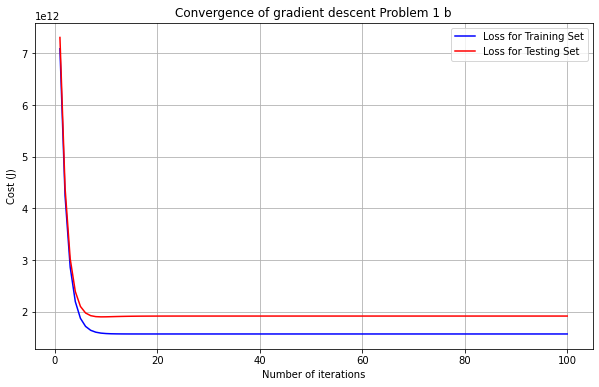

In [112]:
plt.plot(range(1, iterations + 1),cost_train, color='blue', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Testing Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent Problem 1 b')